In [ ]:
!pip install tensorflow opencv-python scikit-learn numpy matplotlib


In [4]:
import os
import json

# Ensure Kaggle API client is installed
!pip install -q kaggle

# Set up Kaggle API credentials
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Download the CEDAR dataset
!kaggle datasets download -d shreelakshmigp/cedardataset

# Unzip the dataset
!unzip cedardataset.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shreelakshmigp/cedardataset
License(s): unknown
 98% 238M/242M [00:03<00:00, 67.5MB/s]
100% 242M/242M [00:03<00:00, 67.5MB/s]
Archive:  cedardataset.zip
  inflating: signatures/Readme.txt   
  inflating: signatures/full_forg/Thumbs.db  
  inflating: signatures/full_forg/forgeries_10_1.png  
  inflating: signatures/full_forg/forgeries_10_10.png  
  inflating: signatures/full_forg/forgeries_10_11.png  
  inflating: signatures/full_forg/forgeries_10_12.png  
  inflating: signatures/full_forg/forgeries_10_13.png  
  inflating: signatures/full_forg/forgeries_10_14.png  
  inflating: signatures/full_forg/forgeries_10_15.png  
  inflating: signatures/full_forg/forgeries_10_16.png  
  inflating: signatures/full_forg/forgeries_10_17.png  
  inflating: signatures/full_forg/forgeries_10_18.png  
  inflating: signatures/fu

In [ ]:
!ls
!ls signatures


cedardataset.zip  sample_data  signatures
full_forg  full_org  Readme.txt


In [3]:
!ls signatures/full_org | head -n 5 # List first 5 files in full_org
!ls signatures/full_forg | head -n 5 # List first 5 files in full_forg


ls: cannot access 'signatures/full_org': No such file or directory
ls: cannot access 'signatures/full_forg': No such file or directory


In [1]:
import numpy as np
import os
import cv2

def load_signatures(data_dir, limit=50000, target_size=(64, 64)):
    genuine_signatures = []
    forged_signatures = []
    genuine_writers = []
    forged_writers = []
    genuine_count = 0
    forged_count = 0

    print("--- load_signatures function started ---")

    genuine_dir = os.path.join(data_dir, 'full_org')
    forged_dir = os.path.join(data_dir, 'full_forg')

    print(f"Genuine signatures directory: {genuine_dir}")
    print(f"Forged signatures directory: {forged_dir}")

    # Load Genuine Signatures (Limited and Resize)
    try:
        for filename in os.listdir(genuine_dir):
            if genuine_count >= limit:
                break
            if filename.startswith('original_') and filename.endswith('.png'):
                img_path = os.path.join(genuine_dir, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    print(f"  Loaded genuine: {filename}, Shape IMMEDIATELY AFTER imread: {img.shape}") # *** PRINT SHAPE HERE ***
                    resized_img = cv2.resize(img, target_size)
                    print(f"  Resized to: {resized_img.shape}")
                    genuine_signatures.append(resized_img)
                    writer_id = filename[len('original_'):filename.find('_', len('original_'))]
                    writer_id_str = str(writer_id)
                    genuine_writers.append(writer_id_str)
                    genuine_count += 1
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping file (genuine): {filename}")
    except Exception as e:
        print(f"Error loading genuine signatures: {e}")

    # Load Forged Signatures (Limited and Resize)
    try:
        for filename in os.listdir(forged_dir):
            if forged_count >= limit:
                break
            if filename.startswith('forgeries_') and filename.endswith('.png'):
                img_path = os.path.join(forged_dir, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    print(f"  Loaded forged: {filename}, Shape IMMEDIATELY AFTER imread: {img.shape}") # *** PRINT SHAPE HERE ***
                    resized_img = cv2.resize(img, target_size)
                    print(f"  Resized to: {resized_img.shape}")
                    forged_signatures.append(resized_img)
                    writer_id = filename[len('forgeries_'):filename.find('_', len('forgeries_'))]
                    writer_id_str = str(writer_id)
                    forged_writers.append(writer_id_str)
                    forged_count += 1
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping file (forged): {filename}")
    except Exception as e:
        print(f"Error loading forged signatures: {e}")

    print("--- Dataset Size Summary (Limited) ---")
    print(f"Number of genuine signatures loaded (limited to {limit}):", len(genuine_signatures))
    print(f"Number of forged signatures loaded (limited to {limit}):", len(forged_signatures))
    print(f"Number of genuine writer IDs loaded (limited to {limit}):", len(genuine_writers))
    print(f"Number of forged writer IDs loaded (limited to {limit}):", len(forged_writers))
    print("--- load_signatures function finished ---")

    return genuine_signatures, forged_signatures, genuine_writers, forged_writers


In [2]:
data_dir = 'signatures' # Or your data directory path
genuine_sigs, forged_sigs, genuine_writers, forged_writers = load_signatures(data_dir)

# *** NUMPY ARRAY CONVERSIONS (as before) ***
genuine_signatures_train = np.array(genuine_sigs)
forged_signatures_train = np.array(forged_sigs)
genuine_writers_train = np.array(genuine_writers)
forged_writers_train = np.array(forged_writers)

# *** TYPE CHECK PRINT STATEMENTS (as before) ***
print("\n--- Type Check AFTER Data Loading ---")
print("Type of genuine_signatures_train:", type(genuine_signatures_train))
print("Type of forged_signatures_train:", type(forged_signatures_train))


Streaming output truncated to the last 5000 lines.
  Loaded genuine: original_4_14.png, Shape IMMEDIATELY AFTER imread: (265, 486)
  Resized to: (64, 64)
  Loaded genuine: original_53_23.png, Shape IMMEDIATELY AFTER imread: (282, 570)
  Resized to: (64, 64)
  Loaded genuine: original_27_7.png, Shape IMMEDIATELY AFTER imread: (384, 330)
  Resized to: (64, 64)
  Loaded genuine: original_51_22.png, Shape IMMEDIATELY AFTER imread: (378, 630)
  Resized to: (64, 64)
  Loaded genuine: original_4_9.png, Shape IMMEDIATELY AFTER imread: (270, 480)
  Resized to: (64, 64)
  Loaded genuine: original_25_14.png, Shape IMMEDIATELY AFTER imread: (253, 301)
  Resized to: (64, 64)
  Loaded genuine: original_33_17.png, Shape IMMEDIATELY AFTER imread: (247, 372)
  Resized to: (64, 64)
  Loaded genuine: original_10_12.png, Shape IMMEDIATELY AFTER imread: (409, 546)
  Resized to: (64, 64)
  Loaded genuine: original_12_8.png, Shape IMMEDIATELY AFTER imread: (409, 624)
  Resized to: (64, 64)
  Loaded genuine: 

In [3]:
from sklearn.model_selection import train_test_split

def split_data_writer_independent(genuine_signatures, forged_signatures, genuine_writers, forged_writers, test_size=0.2, validation_size=0.15, random_state=42):
    """Splits data into training, validation, and test sets, ensuring writer independence, and returns writer IDs for each set."""

    unique_writers = sorted(list(set(genuine_writers)))
    train_writers, test_val_writers = train_test_split(unique_writers, test_size=test_size + validation_size, random_state=random_state)
    val_writers, test_writers = train_test_split(test_val_writers, test_size=test_size / (test_size + validation_size) if (test_size + validation_size) > 0 else 0, random_state=random_state)

    train_genuine_sigs, val_genuine_sigs, test_genuine_sigs = [], [], []
    train_forged_sigs, val_forged_sigs, test_forged_sigs = [], [], []
    train_genuine_writer_ids, val_genuine_writer_ids, test_genuine_writer_ids = [], [], [] # Lists for writer IDs
    train_forged_writer_ids, val_forged_writer_ids, test_forged_writer_ids = [], [], []   # Lists for writer IDs


    # Assign genuine signatures and writer IDs to sets based on writer ID
    for sig, writer_id in zip(genuine_signatures, genuine_writers):
        if writer_id in train_writers:
            train_genuine_sigs.append(sig)
            train_genuine_writer_ids.append(writer_id) # Add writer ID to train list
        elif writer_id in val_writers:
            val_genuine_sigs.append(sig)
            val_genuine_writer_ids.append(writer_id)   # Add writer ID to val list
        elif writer_id in test_writers:
            test_genuine_sigs.append(sig)
            test_genuine_writer_ids.append(writer_id)  # Add writer ID to test list

    # Assign forged signatures and writer IDs to sets based on writer ID
    for sig, writer_id in zip(forged_signatures, forged_writers):
        if writer_id in train_writers:
            train_forged_sigs.append(sig)
            train_forged_writer_ids.append(writer_id)   # Add writer ID to train list
        elif writer_id in val_writers:
            val_forged_sigs.append(sig)
            val_forged_writer_ids.append(writer_id)     # Add writer ID to val list
        elif writer_id in test_writers:
            test_forged_sigs.append(sig)
            test_forged_writer_ids.append(writer_id)    # Add writer ID to test list

    return (train_genuine_sigs, train_forged_sigs, val_genuine_sigs, val_forged_sigs, test_genuine_sigs, test_forged_sigs,
            train_genuine_writer_ids, train_forged_writer_ids, val_genuine_writer_ids, val_forged_writer_ids, test_genuine_writer_ids, test_forged_writer_ids) # Return writer ID lists as well


In [4]:
import cv2
import numpy as np
import random
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt # Make sure matplotlib is imported

def enhance_signature_image(img):
    """Enhance function - same as before"""
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    unsharp_mask = cv2.addWeighted(img, 1.5, blurred_img, -0.5, 0)
    return unsharp_mask


def preprocess_signatures(signatures, target_size=(64, 64), binarize=True, augmentation=True, return_examples=False):
    processed_signatures = []
    example_images = []
    example_count = 5

    for i, img in enumerate(signatures):
        print(f"Shape of image BEFORE resizing: {img.shape}")
        original_img = img.copy()
        resized_img = cv2.resize(img, target_size)
        resized_img = resized_img.astype(np.uint8)
        print(f"Shape of image AFTER resizing: {resized_img.shape}") # *** PRINT SHAPE AFTER RESIZING ***


        if return_examples and i < example_count:
            example_images.append(("Original", original_img)) # Store original
            example_images.append(("Resized (Before Enhance)", resized_img)) # Store resized image *before* enhancement


        resized_img = enhance_signature_image(resized_img)

        if return_examples and i < example_count:
            example_images.append(("Resized & Enhanced", resized_img)) # Store after enhancement


        if augmentation:
            angle = random.uniform(-10, 10)
            rows, cols = resized_img.shape[:2]
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
            resized_img = cv2.warpAffine(resized_img, M, (cols, rows))
            if return_examples and i < example_count:
                example_images.append(("After Rotation", resized_img)) # Store after rotation

            shift_x = random.uniform(-5, 5)
            shift_y = random.uniform(-5, 5)
            translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
            resized_img = cv2.warpAffine(resized_img, translation_matrix, (cols, rows))
            if return_examples and i < example_count:
                example_images.append(("After Shift", resized_img)) # Store after shift

            # *** COMMENTED OUT ELASTIC DEFORMATION BLOCK ***
            # alpha = random.uniform(0.1, 0.2) # VERY REDUCED alpha (0.1 to 0.2) - make deformation very subtle
            # sigma = random.uniform(3, 5)      # INCREASED sigma (3 to 5) - more smoothing
            # dx = gaussian_filter((np.random.rand(*resized_img.shape) * 2 - 1), sigma) * alpha
            # dy = gaussian_filter((np.random.rand(*resized_img.shape) * 2 - 1), sigma) * alpha

            # if return_examples and i < example_count:
            #     # Scale and shift dx and dy to be in the range [0, 255] for visualization
            #     dx_scaled = ((dx + abs(dx.min())) / (dx.max() + abs(dx.min()))) * 255
            #     dy_scaled = ((dy + abs(dy.min())) / (dy.max() + abs(dy.min()))) * 255
            #     example_images.append(("DX Displacement Field", dx_scaled.astype(np.uint8))) # Store DX field
            #     example_images.append(("DY Displacement Field", dy_scaled.astype(np.uint8))) # Store DY field

            # x, y = np.meshgrid(np.arange(resized_img.shape[0]), np.arange(resized_img.shape[1]))
            # indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1))
            # resized_img = cv2.remap(resized_img, np.float32(indices[1]), np.float32(indices[0]), cv2.INTER_LINEAR)
            # if return_examples and i < example_count:
            #     example_images.append(("After Elastic Deform", resized_img)) # Store after elastic deformation


        print(f"Data type of resized_img JUST BEFORE threshold: {resized_img.dtype}")

        if binarize:
            _, binarized_img = cv2.threshold(resized_img, 180, 255, cv2.THRESH_BINARY) # Fixed threshold of 180
            normalized_img = binarized_img / 255.0
            if return_examples and i < example_count:
                example_images.append(("Binarized & Normalized", normalized_img)) # Store binarized and normalized
        else:
            normalized_img = resized_img / 255.0
            if return_examples and i < example_count:
                example_images.append(("Normalized", normalized_img)) # Store just normalized


        processed_signatures.append(normalized_img)


    if return_examples:
        return np.array(processed_signatures), example_images
    else:
        return np.array(processed_signatures)


Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8


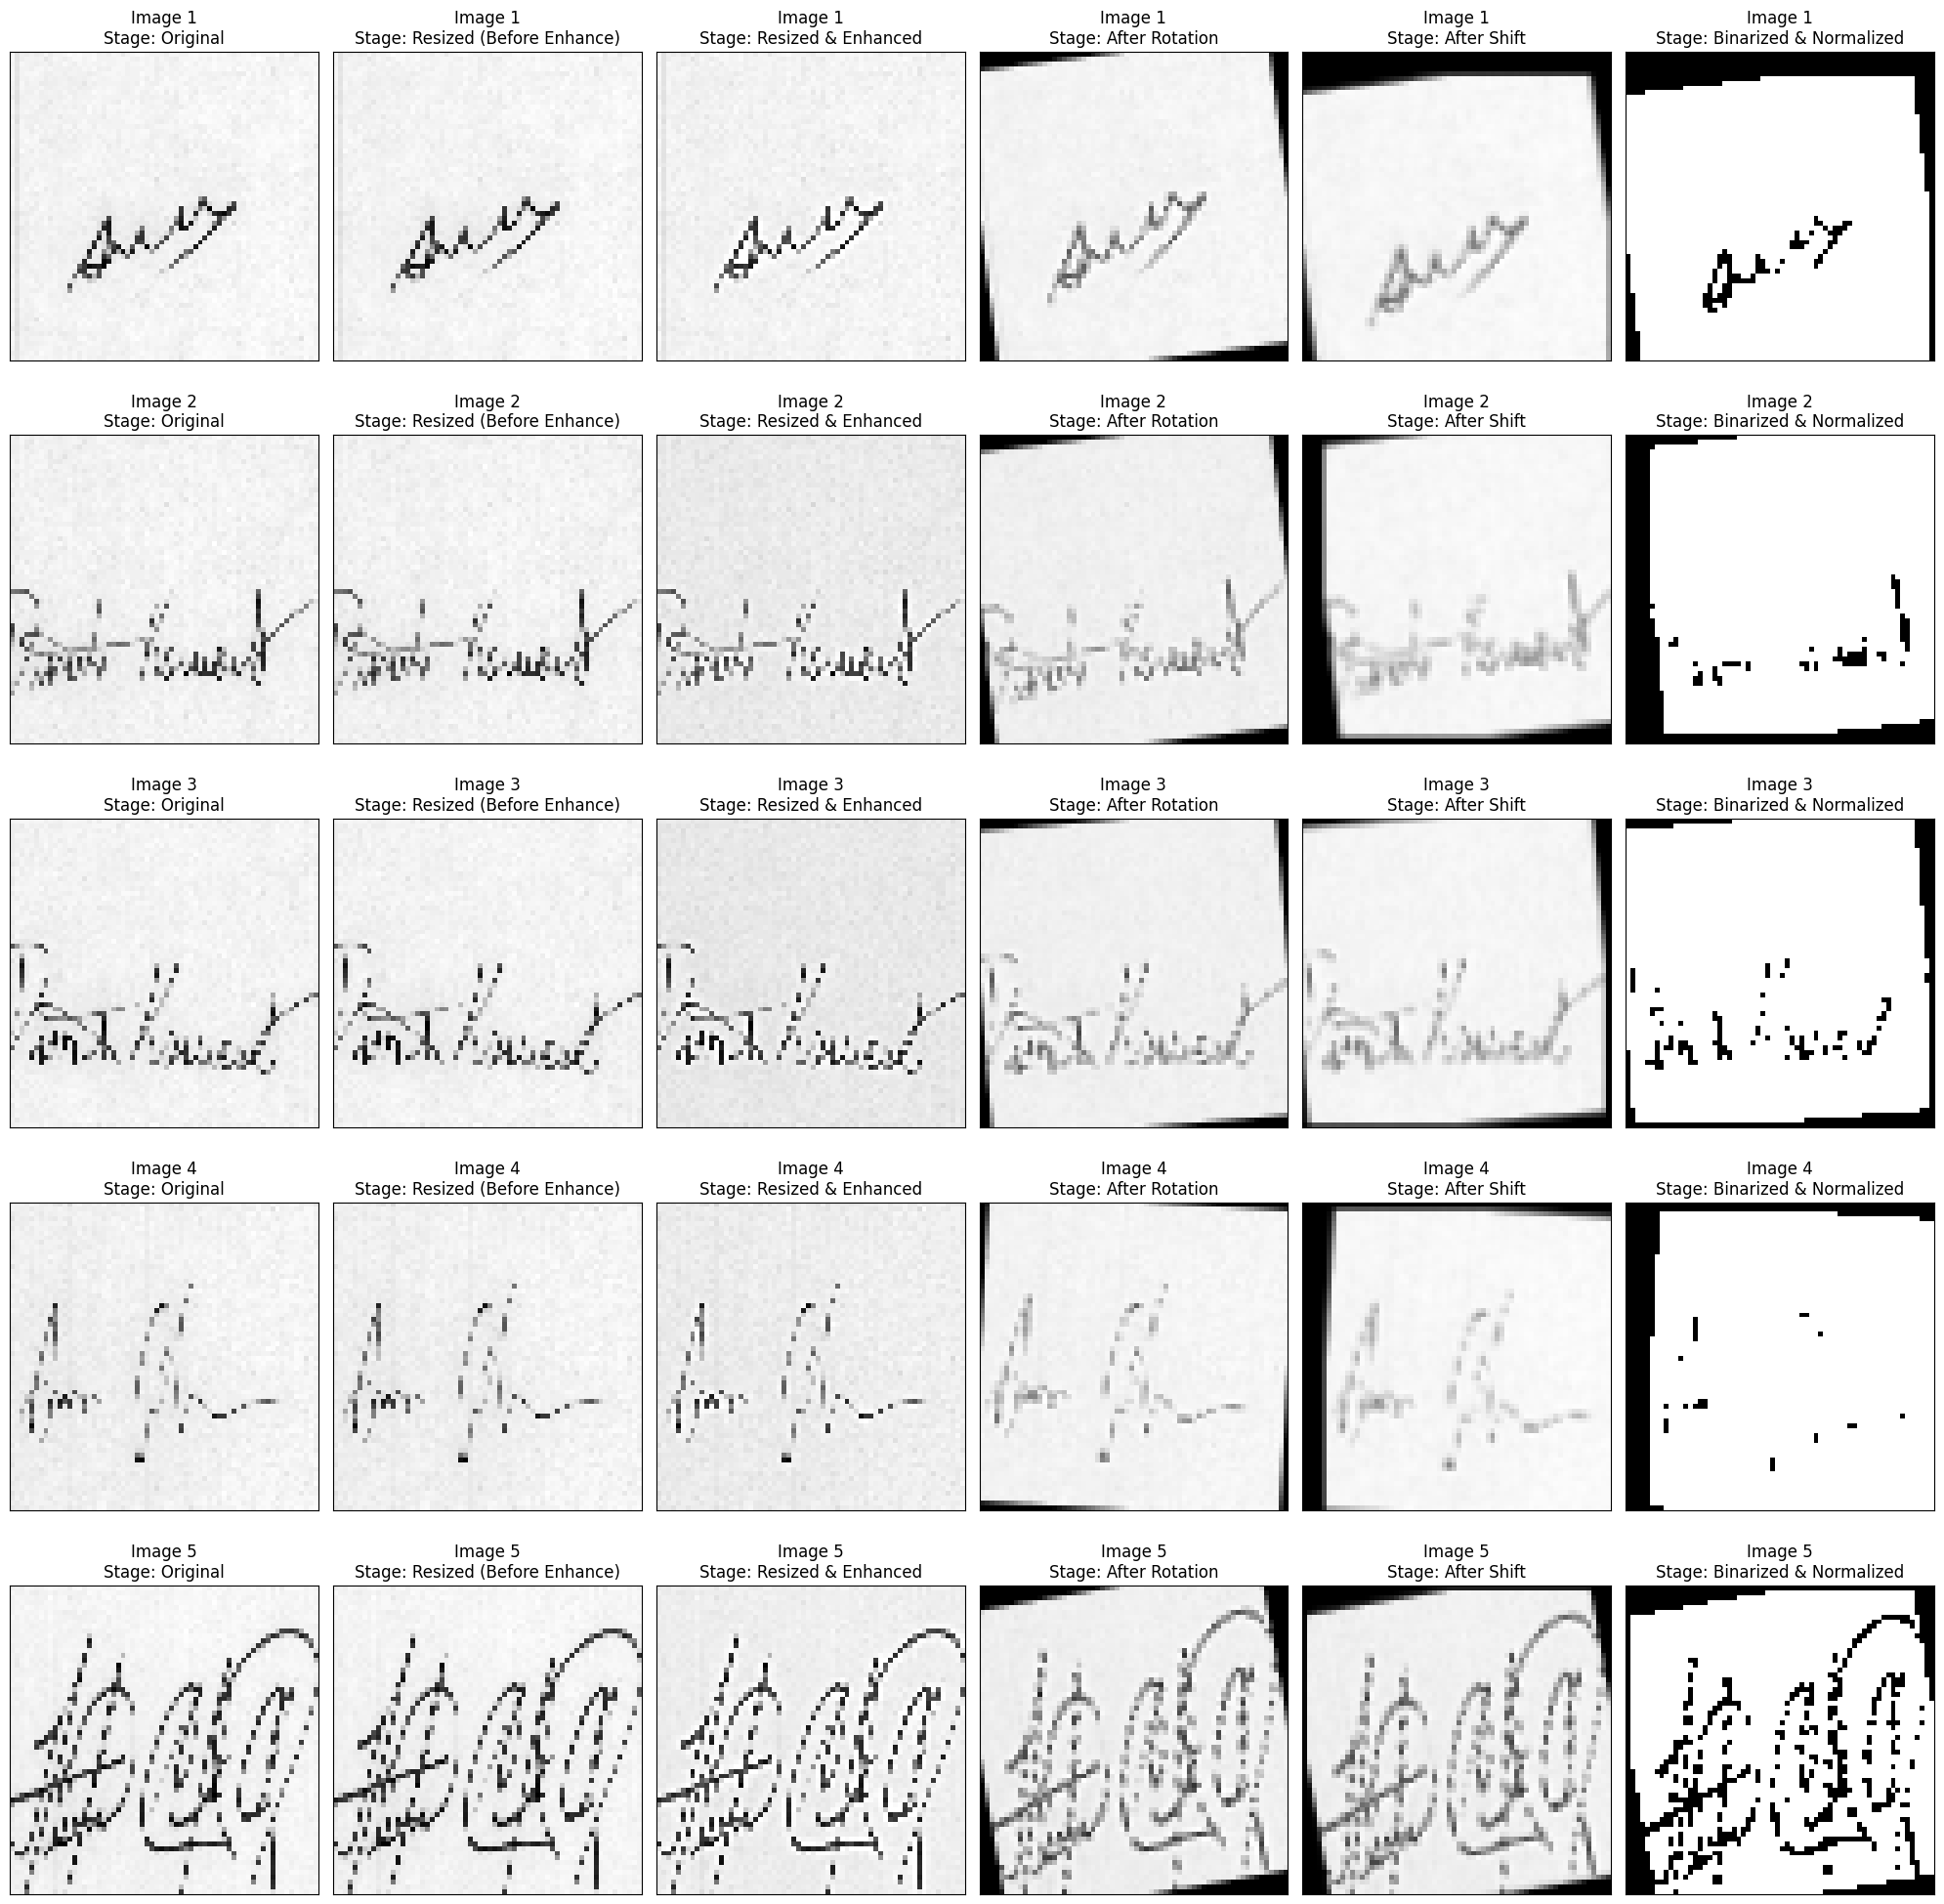

In [5]:
import matplotlib.pyplot as plt

# Load a small batch of training signatures (e.g., first 5 genuine signatures)
num_examples_to_visualize = 5
example_signatures = genuine_signatures_train[:num_examples_to_visualize] # Load a few genuine signatures

# Preprocess with return_examples=True
processed_examples, example_images = preprocess_signatures(example_signatures, return_examples=True)

# Visualize the example images - MODIFIED VISUALIZATION CODE to handle stages
plt.figure(figsize=(20, 20)) # Increased figure size for more columns and displacement fields
num_stages = len(example_images) // num_examples_to_visualize # Stages per example
num_cols = num_stages # Number of columns in subplot grid

for i in range(num_examples_to_visualize):
    for j in range(num_stages):
        stage_name, img = example_images[i * num_stages + j] # Correctly unpack tuple into stage_name and img
        plt.subplot(num_examples_to_visualize, num_cols, i * num_cols + j + 1) # Adjusted subplot indexing
        plt.imshow(img, cmap='gray' if "Displacement Field" not in stage_name else 'RdBu_r') # Use 'RdBu_r' for displacement fields
        plt.title(f"Image {i+1}\nStage: {stage_name}") # Use stage_name in title
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import random

def create_signature_pairs(genuine_signatures, forged_signatures, genuine_writers, forged_writers):
    """
    Generates pairs of signatures for Siamese network training and their labels.
    [... function documentation as before ...]
    """
    pairs = []
    labels = []

    num_genuine = len(genuine_signatures)
    num_forged = len(forged_signatures)

    print("Starting create_signature_pairs...") # ADDED
    print(f"Number of genuine signatures received: {num_genuine}") # ADDED
    print(f"Number of forged signatures received: {num_forged}") # ADDED

    # 1. Genuine Pairs - Signatures from the same writer
    writer_signature_map_genuine = {} # Group genuine signatures by writer
    for sig, writer_id in zip(genuine_signatures, genuine_writers):
        print(f"  Genuine - Writer ID: {writer_id}, Type: {type(writer_id)}") # ADDED
        if writer_id not in writer_signature_map_genuine:
            writer_signature_map_genuine[writer_id] = []
        writer_signature_map_genuine[writer_id].append(sig)

    print(f"Genuine writer map keys: {writer_signature_map_genuine.keys()}") # ADDED

    for writer_id in writer_signature_map_genuine:
        signatures_of_writer = writer_signature_map_genuine[writer_id]
        if len(signatures_of_writer) < 2: # Need at least 2 genuine signatures to form a genuine pair
            continue
        for i in range(len(signatures_of_writer)):
            for j in range(i + 1, len(signatures_of_writer)): # Avoid duplicate pairs and pairing with itself
                pairs.append([signatures_of_writer[i], signatures_of_writer[j]]) # Form genuine pair
                labels.append(1) # Label as genuine (1)


    # 2. Forged Pairs - Signatures from different writers (or genuine vs. forgery - in this dataset, forgeries are linked to writers)
    writer_signature_map_forged = {} # Group forged signatures by writer (though forgeries are not strictly writer-specific in CEDAR, using writer ID prefix)
    for sig, writer_id in zip(forged_signatures, forged_writers):
        print(f"  Forged - Writer ID: {writer_id}, Type: {type(writer_id)}") # ADDED
        if writer_id not in writer_signature_map_forged:
            writer_signature_map_forged[writer_id] = []
        writer_signature_map_forged[writer_id].append(sig)

    print(f"Forged writer map keys: {writer_signature_map_forged.keys()}") # ADDED


    for writer_id in writer_signature_map_genuine: # Iterate through genuine writers
        if writer_id not in writer_signature_map_forged: # Skip if no forgeries for this writer (shouldn't happen in CEDAR)
            continue

        genuine_writer_signatures = writer_signature_map_genuine[writer_id]
        forged_writer_signatures = writer_signature_map_forged[writer_id]

        for genuine_sig in genuine_writer_signatures:
            # Pair genuine signature with a forged signature from the same writer (skilled forgery case)
            if forged_writer_signatures: # Ensure there are forgeries for this writer
                forged_sig = random.choice(forged_writer_signatures) # Randomly pick a forgery from the same writer
                pairs.append([genuine_sig, forged_sig])
                labels.append(0) # Label as forged (0)


    print(f"Number of pairs created: {len(pairs)}") # ADDED
    print("Ending create_signature_pairs...") # ADDED
    return np.array(pairs), np.array(labels) # Return pairs and labels as NumPy arrays


In [ ]:
print("split_data_writer_independent function call completed (supposedly)")


split_data_writer_independent function call completed (supposedly)


In [7]:
data_dir = 'signatures'
genuine_sigs, forged_sigs, genuine_writers, forged_writers = load_signatures(data_dir)

processed_genuine_sigs = preprocess_signatures(genuine_sigs)
processed_forged_sigs = preprocess_signatures(forged_sigs)

(train_genuine_sigs, train_forged_sigs,
 val_genuine_sigs, val_forged_sigs,
 test_genuine_sigs, test_forged_sigs,
 train_genuine_writer_ids, train_forged_writer_ids,
 val_genuine_writer_ids, val_forged_writer_ids,
 test_genuine_writer_ids, test_forged_writer_ids) = split_data_writer_independent( # Capture all 12 returned lists
    processed_genuine_sigs, processed_forged_sigs, genuine_writers, forged_writers,
    test_size=0.2, validation_size=0.15, random_state=42
)


# Create training pairs - NOW USING CORRECT WRITER ID LISTS
# Create training pairs - NOW USING CORRECT WRITER ID LISTS
train_pairs, train_labels = create_signature_pairs(
    train_genuine_sigs, train_forged_sigs, train_genuine_writer_ids, train_forged_writer_ids
)

# Create validation pairs - NOW USING CORRECT WRITER ID LISTS
val_pairs, val_labels = create_signature_pairs(
    val_genuine_sigs, val_forged_sigs, val_genuine_writer_ids, val_forged_writer_ids
)


print("Number of Training Pairs:", len(train_pairs))
print("Number of Validation Pairs:", len(val_pairs))
print("Shape of a Training Pair (first image):", train_pairs[0][0].shape)
print("Shape of Training Labels:", train_labels.shape)


Streaming output truncated to the last 5000 lines.
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shap

In [8]:
import numpy as np

# 1. Reshape Training Pairs
input_shape = (64, 64, 1) # Make sure this matches your target_size and input_shape

# Initialize empty arrays to store the two branches of the input pairs
pairs_train_img1 = np.zeros((len(train_pairs), input_shape[0], input_shape[1], input_shape[2]))
pairs_train_img2 = np.zeros((len(train_pairs), input_shape[0], input_shape[1], input_shape[2]))

for i in range(len(train_pairs)):
    pairs_train_img1[i,:,:,:] = train_pairs[i][0].reshape(input_shape) # Reshape and assign the first image of the pair
    pairs_train_img2[i,:,:,:] = train_pairs[i][1].reshape(input_shape) # Reshape and assign the second image of the pair

# Convert to NumPy arrays and ensure float32 data type for images, int32 for labels
train_labels = np.array(train_labels).astype('int32') # Or 'float32' if you used categorical crossentropy and one-hot encoded labels

# 2. Reshape Validation Pairs (Do the same for validation data)
pairs_val_img1 = np.zeros((len(val_pairs), input_shape[0], input_shape[1], input_shape[2]))
pairs_val_img2 = np.zeros((len(val_pairs), input_shape[0], input_shape[1], input_shape[2]))

for i in range(len(val_pairs)):
    pairs_val_img1[i,:,:,:] = val_pairs[i][0].reshape(input_shape) # Reshape and assign the first image of the pair
    pairs_val_img2[i,:,:,:] = val_pairs[i][1].reshape(input_shape) # Reshape and assign the second image of the pair

val_labels = np.array(val_labels).astype('int32') # Or 'float32'


# --- Print Shapes to Verify ---
print("--- Reshaped Data Summary ---")
print("Shape of pairs_train_img1:", pairs_train_img1.shape)
print("Shape of pairs_train_img2:", pairs_train_img2.shape)
print("Shape of train_labels:", train_labels.shape)

print("Shape of pairs_val_img1:", pairs_val_img1.shape)
print("Shape of pairs_val_img2:", pairs_val_img2.shape)
print("Shape of val_labels:", val_labels.shape)

print("\nData type of pairs_train_img1:", pairs_train_img1.dtype)
print("Data type of train_labels:", train_labels.dtype)


--- Reshaped Data Summary ---
Shape of pairs_train_img1: (10500, 64, 64, 1)
Shape of pairs_train_img2: (10500, 64, 64, 1)
Shape of train_labels: (10500,)
Shape of pairs_val_img1: (2400, 64, 64, 1)
Shape of pairs_val_img2: (2400, 64, 64, 1)
Shape of val_labels: (2400,)

Data type of pairs_train_img1: float64
Data type of train_labels: int32


In [9]:
print("--- Data Split Summary ---")
print("Number of training genuine signatures:", len(train_genuine_sigs))
print("Number of training forged signatures:", len(train_forged_sigs))
print("Number of validation genuine signatures:", len(val_genuine_sigs))
print("Number of validation forged signatures:", len(val_forged_sigs))
print("Number of test genuine signatures:", len(test_genuine_sigs))
print("Number of test forged signatures:", len(test_forged_sigs))

print("\n--- Training Writer IDs (First 10) ---")
print("Genuine Writers:", train_genuine_writer_ids[:10])
print("Forged Writers:", train_forged_writer_ids[:10])

print("\n--- Validation Writer IDs (First 10) ---")
print("Genuine Writers:", val_genuine_writer_ids[:10])
print("Forged Writers:", val_forged_writer_ids[:10])

print("\n--- Test Writer IDs (First 10) ---")
print("Genuine Writers:", test_genuine_writer_ids[:10])
print("Forged Writers:", test_forged_writer_ids[:10])

print("\n--- Unique Writers in Splits ---")
print("Unique training writers (genuine):", sorted(list(set(train_genuine_writer_ids))))
print("Unique validation writers (genuine):", sorted(list(set(val_genuine_writer_ids))))
print("Unique test writers (genuine):", sorted(list(set(test_genuine_writer_ids))))


--- Data Split Summary ---
Number of training genuine signatures: 840
Number of training forged signatures: 840
Number of validation genuine signatures: 192
Number of validation forged signatures: 192
Number of test genuine signatures: 288
Number of test forged signatures: 288

--- Training Writer IDs (First 10) ---
Genuine Writers: ['41', '8', '1', '23', '3', '31', '19', '8', '28', '44']
Forged Writers: ['10', '28', '51', '44', '3', '45', '45', '29', '5', '48']

--- Validation Writer IDs (First 10) ---
Genuine Writers: ['17', '17', '33', '17', '34', '7', '33', '7', '27', '20']
Forged Writers: ['17', '7', '20', '34', '47', '47', '34', '20', '20', '47']

--- Test Writer IDs (First 10) ---
Genuine Writers: ['25', '13', '13', '39', '21', '49', '52', '13', '39', '21']
Forged Writers: ['54', '49', '13', '38', '21', '52', '54', '54', '21', '40']

--- Unique Writers in Splits ---
Unique training writers (genuine): ['1', '10', '11', '16', '18', '19', '2', '22', '23', '24', '26', '28', '29', '3

In [10]:
from tensorflow.keras import layers, models

def create_base_network(input_shape):
    """
    Base network to be shared (Siamese network) - Deeper version
    """
    seq_input = layers.Input(shape=input_shape)

    # Convolutional layers - Deeper network with one more Conv block
    x = layers.Conv2D(32, (3, 3), activation='relu')(seq_input)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu')(x) # Existing layer
    x = layers.MaxPooling2D((2, 2))(x) # Existing layer

    # *** ADDED Convolutional Block (Deeper Network) ***
    x = layers.Conv2D(256, (3, 3), activation='relu')(x) # NEW Conv layer (more filters)
    x = layers.MaxPooling2D((2, 2))(x) # NEW MaxPool layer
    # *** End of Added Block ***


    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(10, activation='sigmoid')(x) # Output layer (embedding)
    return models.Model(seq_input, x)


In [11]:
from tensorflow.keras import layers, models

def create_base_network(input_shape):
    """
    Base network to be shared ( Siamese network)
    """
    seq_input = layers.Input(shape=input_shape)

    # Convolutional layers with Dropout added
    x = layers.Conv2D(32, (3, 3), activation='relu')(seq_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x) # Dropout layer added here

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x) # Dropout layer added here

    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x) # Dropout layer added here

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x) # Dropout layer added here (after dense layer)
    x = layers.Dense(10, activation='sigmoid')(x) # Output layer (embedding)
    return models.Model(seq_input, x)


In [12]:
from tensorflow.keras.losses import Loss
import tensorflow.keras.backend as K

class ContrastiveLoss(Loss):
    def __init__(self, margin=1.0):
        super().__init__()
        self.margin = margin

    def call(self, y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(self.margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)


In [13]:
from tensorflow.keras import layers, models, Input
import tensorflow.keras.backend as K

def create_siamese_network(input_shape, base_network_model): # Corrected function definition
    """
    Constructs a Siamese Network using the given base network and L1 distance.
    """
    # Input layers for signature pairs
    input_sig_1 = Input(shape=input_shape, name="signature_input_1")
    input_sig_2 = Input(shape=input_shape, name="signature_input_2")

    # Create twin networks using the base network (sharing weights)
    embedding_network = base_network_model # Use the *model instance* passed as argument
    embedding_1 = embedding_network(input_sig_1) # Process input 1
    embedding_2 = embedding_network(input_sig_2) # Process input 2

    # L1 distance layer to compare embeddings (Corrected to L1 Distance)
    L1_distance = layers.Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))([embedding_1, embedding_2]) # Compute L1 distance

    # Output is the L1 distance
    output = layers.Dense(1, activation='sigmoid')(L1_distance) # Add a dense layer with sigmoid for classification

    return models.Model(inputs=[input_sig_1, input_sig_2], outputs=output) # Output is now 'output'


In [16]:
import tensorflow as tf # Make sure you have this import

# Define input shape (consistent with preprocessing)
input_shape = (64, 64, 1) # Use the smaller target_size (64x64)

# Create base network
base_cnn = create_base_network(input_shape)

# Create Siamese network - using L1 distance version
siamese_net = create_siamese_network(input_shape, base_cnn) # Pass base_cnn instance


# Use Binary Crossentropy loss - more suitable for sigmoid output and classification
binary_crossentropy_loss = tf.keras.losses.BinaryCrossentropy()

# Optimizer
optimizer = tf.keras.optimizers.Adam(0.00001)

# Compile the Siamese network - using binary crossentropy loss
siamese_net.compile(loss=binary_crossentropy_loss, optimizer=optimizer, metrics=['accuracy']) # Compile with binary crossentropy and accuracy

# Model Summary
siamese_net.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ signature_input_1         │ (None, 64, 64, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ signature_input_2         │ (None, 64, 64, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_2 (Functional) │ (None, 10)             │        683,914 │ signature_input_1[0][… │
│                           │                        │                │ signature_input_2[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 10)             │              0 │ functional_2[0][0],    │
│                           │                        │                │ functional_2[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             11 │ lambda_1[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 683,925 (2.61 MB)

 Trainable params: 683,925 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import tensorflow as tf
import numpy as np

# --- Training Configuration ---
batch_size = 32  # You can experiment with different batch sizes (e.g., 16, 32, 64)
epochs = 10      # Start with a smaller number of epochs and increase if needed
input_shape = (64, 64, 1) # Ensure this is consistent



# --- Train the Siamese Network ---
print("Starting training...")
history = siamese_net.fit(
    [pairs_train_img1, pairs_train_img2], # Input pairs (two branches)
    train_labels,                        # Training labels
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([pairs_val_img1, pairs_val_img2], val_labels) # Validation data for monitoring
)
print("Training finished!")


# --- Evaluate the Model after Training ---
print("\n--- Evaluate on Validation Set ---")
val_loss, val_accuracy = siamese_net.evaluate([pairs_val_img1, pairs_val_img2], val_labels)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


# --- Plot Training History (Loss and Accuracy) ---
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


Starting training...
Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 148s 219ms/step - accuracy: 0.1455 - loss: 0.7203 - val_accuracy: 0.9200 - val_loss: 0.6905
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 145s 221ms/step - accuracy: 0.8932 - loss: 0.6902 - val_accuracy: 0.9200 - val_loss: 0.6878
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 202s 220ms/step - accuracy: 0.9181 - loss: 0.6872 - val_accuracy: 0.9200 - val_loss: 0.6851
Epoch 4/10


KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


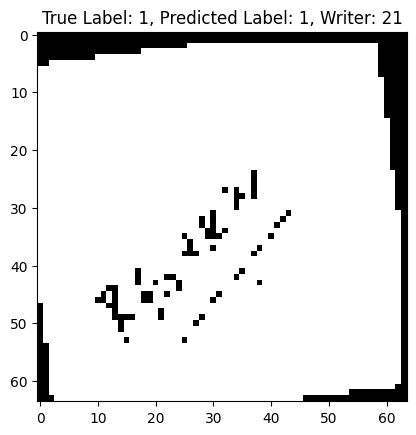

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


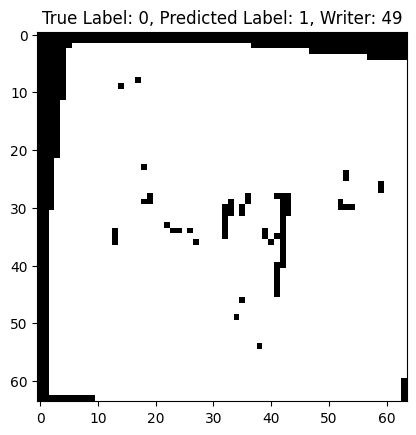

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


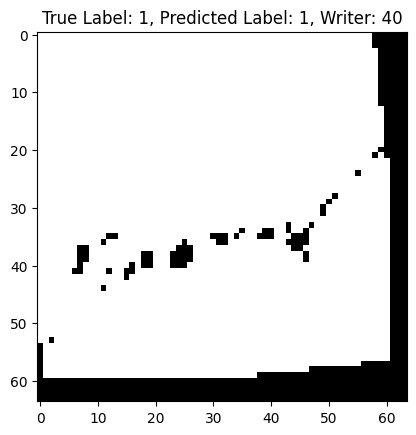

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


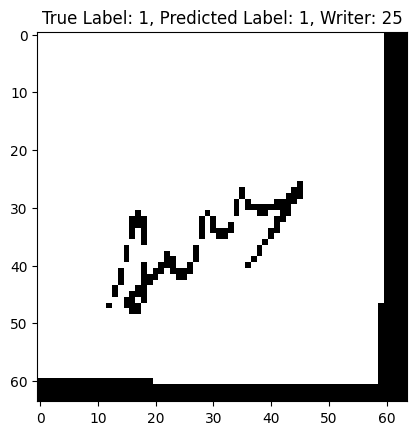

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


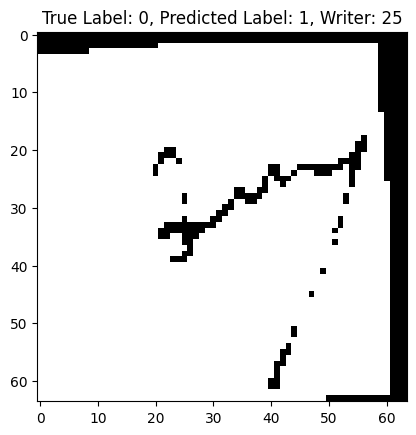

In [18]:


import numpy as np
import matplotlib.pyplot as plt
import random


num_images_to_test = 5  # Number of random images to test

# Combine genuine and forged test signatures and writer IDs for random sampling
all_test_sigs = test_genuine_sigs + test_forged_sigs
all_test_writers = test_genuine_writer_ids + test_forged_writer_ids
all_test_labels = [1] * len(test_genuine_sigs) + [0] * len(test_forged_sigs)


random_indices = random.sample(range(len(all_test_sigs)), num_images_to_test)


for i in random_indices:
    image = all_test_sigs[i]
    writer_id = all_test_writers[i]
    true_label = all_test_labels[i]

    # Prepare the input for the model (assuming the input needs to be reshaped to input_shape)
    input_shape = (64, 64, 1)
    input_image = image.reshape(input_shape)  # Reshape the input image
    input_image = np.expand_dims(input_image, axis=0) # Add a batch dimension


    # Prediction
    # Instead of comparing to another image create a dummy comparison image.
    dummy_image = np.zeros(input_shape)
    dummy_image = np.expand_dims(dummy_image, axis=0)
    prediction = siamese_net.predict([input_image, dummy_image])
    predicted_label = 1 if prediction > 0.5 else 0


    # Display the image and prediction
    plt.imshow(image.reshape(64, 64), cmap='gray')  # Assuming 64x64 images
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}, Writer: {writer_id}")
    plt.show()


In [19]:
# Create test pairs
test_pairs, test_labels = create_signature_pairs(
    test_genuine_sigs,
    test_forged_sigs,
    test_genuine_writer_ids,
    test_forged_writer_ids
)

# Print the number of test pairs and a sample of test labels
print("Number of test pairs:", len(test_pairs))
print("Sample of test labels (first 20):", test_labels[:20])
print("Label distribution in test set:", np.unique(test_labels, return_counts=True))


Starting create_signature_pairs...
Number of genuine signatures received: 288
Number of forged signatures received: 288
  Genuine - Writer ID: 25, Type: <class 'str'>
  Genuine - Writer ID: 13, Type: <class 'str'>
  Genuine - Writer ID: 13, Type: <class 'str'>
  Genuine - Writer ID: 39, Type: <class 'str'>
  Genuine - Writer ID: 21, Type: <class 'str'>
  Genuine - Writer ID: 49, Type: <class 'str'>
  Genuine - Writer ID: 52, Type: <class 'str'>
  Genuine - Writer ID: 13, Type: <class 'str'>
  Genuine - Writer ID: 39, Type: <class 'str'>
  Genuine - Writer ID: 21, Type: <class 'str'>
  Genuine - Writer ID: 25, Type: <class 'str'>
  Genuine - Writer ID: 15, Type: <class 'str'>
  Genuine - Writer ID: 15, Type: <class 'str'>
  Genuine - Writer ID: 49, Type: <class 'str'>
  Genuine - Writer ID: 13, Type: <class 'str'>
  Genuine - Writer ID: 39, Type: <class 'str'>
  Genuine - Writer ID: 25, Type: <class 'str'>
  Genuine - Writer ID: 14, Type: <class 'str'>
  Genuine - Writer ID: 38, Type: <

In [20]:
# Preprocess test signatures
processed_test_genuine_sigs = preprocess_signatures(test_genuine_sigs)
processed_test_forged_sigs = preprocess_signatures(test_forged_sigs)

print("Shape of processed test genuine signatures:", processed_test_genuine_sigs.shape)
print("Shape of processed test forged signatures:", processed_test_forged_sigs.shape)


Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image AFTER resizing: (64, 64)
Data type of resized_img JUST BEFORE threshold: uint8
Shape of image BEFORE resizing: (64, 64)
Shape of image

In [21]:
input_shape = (64, 64, 1) # Ensure this is consistent with your model's input shape

# Initialize empty arrays for test pairs
pairs_test_img1 = np.zeros((len(test_pairs), input_shape[0], input_shape[1], input_shape[2]))
pairs_test_img2 = np.zeros((len(test_pairs), input_shape[0], input_shape[1], input_shape[2]))

for i in range(len(test_pairs)):
    pairs_test_img1[i,:,:,:] = test_pairs[i][0].reshape(input_shape)
    pairs_test_img2[i,:,:,:] = test_pairs[i][1].reshape(input_shape)

test_labels = np.array(test_labels).astype('int32')

# Print shapes of prepared test data
print("Shape of pairs_test_img1:", pairs_test_img1.shape)
print("Shape of pairs_test_img2:", pairs_test_img2.shape)
print("Shape of test_labels:", test_labels.shape)


Shape of pairs_test_img1: (3600, 64, 64, 1)
Shape of pairs_test_img2: (3600, 64, 64, 1)
Shape of test_labels: (3600,)


In [22]:
# Evaluate the model on the test set
print("\n--- Evaluate on Test Set ---")
evaluation = siamese_net.evaluate([pairs_test_img1, pairs_test_img2], test_labels)

# Print test loss and test accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])



--- Evaluate on Test Set ---
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.9954 - loss: 0.6837
Test Loss: 0.6851019263267517
Test Accuracy: 0.9200000166893005


In [ ]:
from tensorflow.keras import layers, models

def create_base_network(input_shape):
    """
    Simplified base CNN architecture to extract signature embeddings.
    Reduced filters to decrease memory usage.
    """
    input_signature = layers.Input(shape=input_shape)

    # Convolutional blocks - Reduced filters
    x = layers.Conv2D(16, (3, 3), activation='relu')(input_signature) # Reduced to 16 filters
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(32, (3, 3), activation='relu')(x) # Reduced to 32 filters
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x) # Flatten to dense layer

    # Dense layers for embedding - Kept embedding size, but you can reduce if needed
    x = layers.Dense(128, activation='relu')(x) # Embedding layer
    x = layers.Dropout(0.1)(x) # Dropout for regularization
    x = layers.Dense(64, activation='relu')(x) # Further embedding layer

    return models.Model(inputs=input_signature, outputs=x)
